# Problem Defination:

-Prepare solution to build ticketing system there by using json file as your primary datasource (Text corpus with other metadata in it). 
Step 1: Group data into five categories namely Banking services, loans, Fraudalent reporting, Card, others.
Step 2: From step 1 create labeled dataset and utilize it to train supervised model like logistic regression, decision tree or random forest.


Above excercise should follow these steps -
Load Data
Text Preprocessing
EDA
Feature Extraction
Topic Modelling (Unsupervised)
Model building using Supervised learning
Model Training and evaluation
Inference

Author: Dr. Vishwanath Kagawade

# **Import Libraries**

In [154]:

import json
import nltk

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt



import nltk, re,string
import missingno as msno
import itertools

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.decomposition import NMF



from pprint import pprint
warnings.filterwarnings('ignore')
pd.set_option('max_columns',50)
pd.set_option('max_rows',50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#  Load the JSON file and convert into Pandas dataframe object

In [6]:
#Upload data

from google.colab import files
uploaded = files.upload()

file_name = "Client_data2.json"

 #Parse file
 #JSON file can be easily parsed using json.loads() function. Result is Python dictionary

data=json.loads(uploaded[file_name].decode("utf-8"))

#Convert the jSON data into pandas dataframe
df =pd.json_normalize(data)


KeyError: ignored

In [7]:
#Size of the dataset
df.shape


(19906, 22)

In [8]:
# Get datatypes of each attribute
df.dtypes

_index                                object
_type                                 object
_id                                   object
_score                               float64
_source.tags                          object
_source.zip_code                      object
_source.complaint_id                  object
_source.issue                         object
_source.date_received                 object
_source.state                         object
_source.consumer_disputed             object
_source.product                       object
_source.company_response              object
_source.company                       object
_source.submitted_via                 object
_source.date_sent_to_company          object
_source.company_public_response       object
_source.sub_product                   object
_source.timely                        object
_source.complaint_what_happened       object
_source.sub_issue                     object
_source.consumer_consent_provided     object
dtype: obj

In [9]:
# Get complete information about datarecords including null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             19906 non-null  object 
 1   _type                              19906 non-null  object 
 2   _id                                19906 non-null  object 
 3   _score                             19906 non-null  float64
 4   _source.tags                       2906 non-null   object 
 5   _source.zip_code                   17686 non-null  object 
 6   _source.complaint_id               19906 non-null  object 
 7   _source.issue                      19906 non-null  object 
 8   _source.date_received              19906 non-null  object 
 9   _source.state                      19184 non-null  object 
 10  _source.consumer_disputed          19906 non-null  object 
 11  _source.product                    19906 non-null  obj

In [10]:
# Display the first ten records of the dataset
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [11]:
# Display the Last ten records of the dataset
df.tail()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
19901,complaint-public-v2,complaint,3963366,0.0,None,94536,3963366,Closing your account,2020-11-19T12:00:00-05:00,CA,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-11-19T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Company closed your account,Consent not provided
19902,complaint-public-v2,complaint,1813027,0.0,None,018XX,1813027,"Loan servicing, payments, escrow account",2016-03-02T12:00:00-05:00,MA,Yes,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2016-03-02T12:00:00-05:00,None,Conventional fixed mortgage,Yes,To whom it may concern : I have mortgage with ...,None,Consent provided
19903,complaint-public-v2,complaint,3767150,0.0,None,None,3767150,Getting a credit card,2020-07-28T12:00:00-05:00,None,N/A,Credit card or prepaid card,Closed with non-monetary relief,JPMORGAN CHASE & CO.,Phone,2020-07-28T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Card opened as result of identity theft or fraud,N/A
19904,complaint-public-v2,complaint,4240890,0.0,None,077XX,4240890,Closing an account,2021-03-24T12:00:00-05:00,NJ,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2021-03-24T12:00:00-05:00,None,Checking account,Yes,,Can't close your account,None
19905,complaint-public-v2,complaint,4019917,0.0,None,347XX,4019917,Problem with a purchase shown on your statement,2020-12-18T12:00:00-05:00,FL,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-12-18T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Card was charged for something you did not pur...,Consent not provided


In [12]:
# Display column/attribute name
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [13]:
df.describe

<bound method NDFrame.describe of                     _index      _type      _id  _score   _source.tags  \
0      complaint-public-v2  complaint  3211475     0.0           None   
1      complaint-public-v2  complaint  3229299     0.0  Servicemember   
2      complaint-public-v2  complaint  3199379     0.0           None   
3      complaint-public-v2  complaint  2673060     0.0           None   
4      complaint-public-v2  complaint  3203545     0.0           None   
...                    ...        ...      ...     ...            ...   
19901  complaint-public-v2  complaint  3963366     0.0           None   
19902  complaint-public-v2  complaint  1813027     0.0           None   
19903  complaint-public-v2  complaint  3767150     0.0           None   
19904  complaint-public-v2  complaint  4240890     0.0           None   
19905  complaint-public-v2  complaint  4019917     0.0           None   

      _source.zip_code _source.complaint_id  \
0                90301              321147

# **Exploratory Data Analysis**

In [16]:
# We can use seaborn to create a simple heatmap to see where we are missing data!

#Check for presence of null values
df.isnull()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19901,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
19902,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
19903,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
19904,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


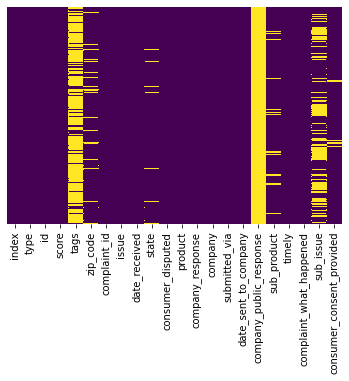

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#Assign new column names
df.columns = ['index', 'type', 'id', 'score', 'tags', 'zip_code','complaint_id', 'issue', 'date_received',
       'state', 'consumer_disputed', 'product','company_response', 'company', 'submitted_via',
       'date_sent_to_company', 'company_public_response','sub_product', 'timely',
       'complaint_what_happened', 'sub_issue','consumer_consent_provided']

In [21]:
#Visualize the missing values across the columns in the dataframe
#msno.heatmap(df)

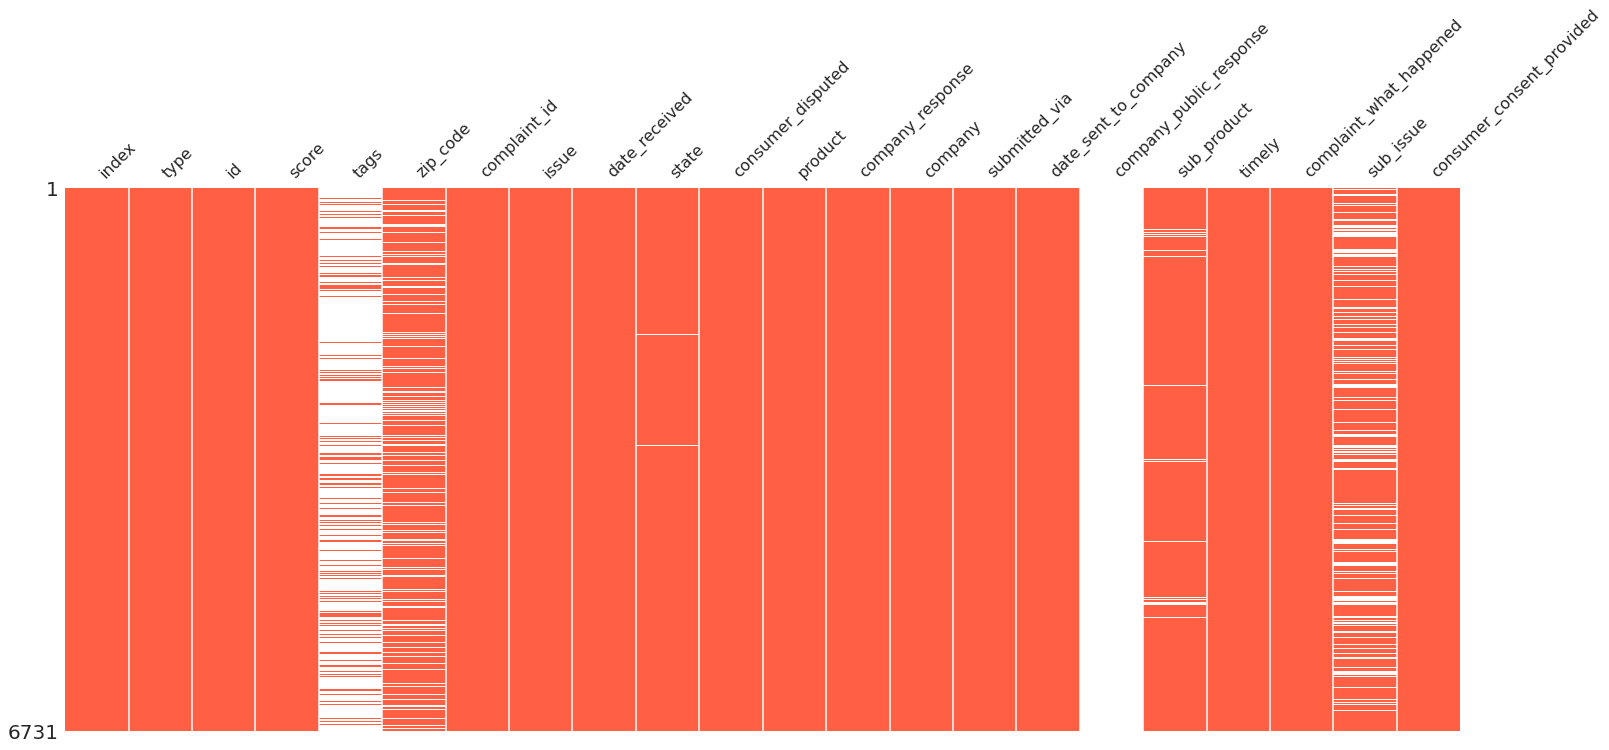

In [178]:

msno.matrix(df, sparkline=False, color=(1, 0.38, 0.27))

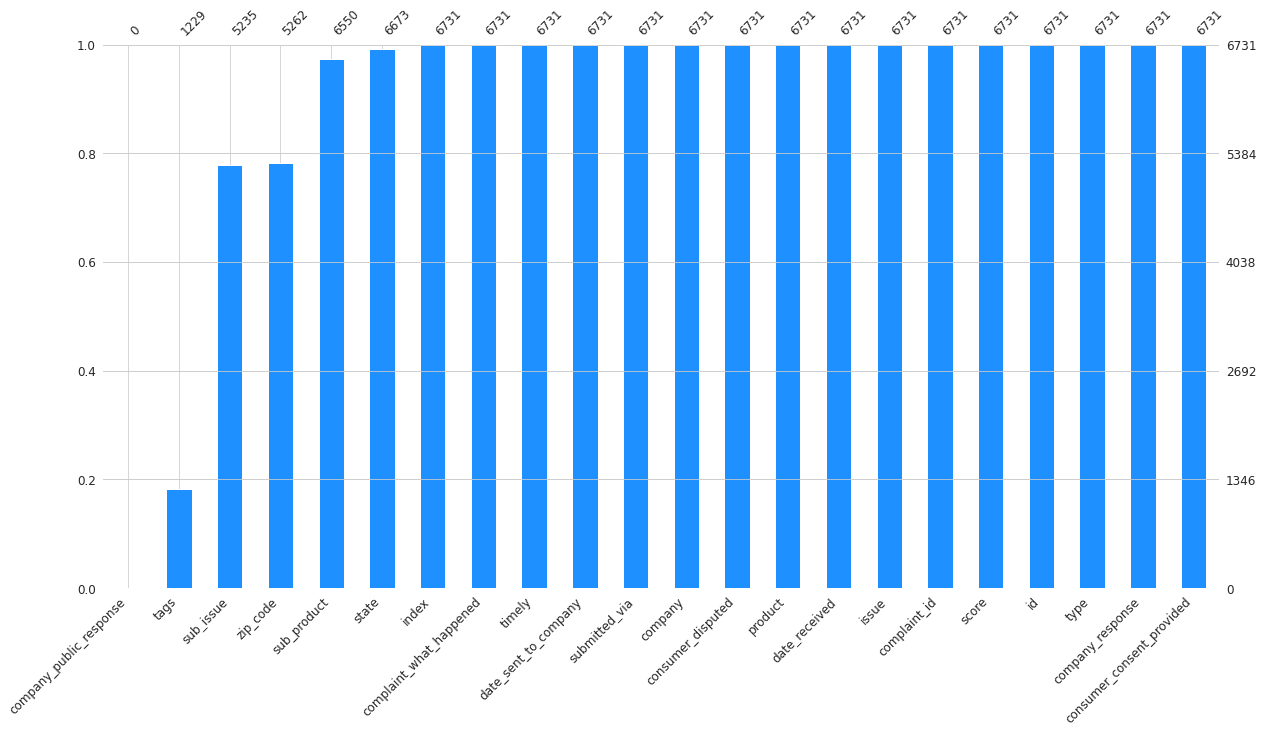

In [174]:
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(20,10), fontsize=12);

Below we have plotted a heatmap showing nullity correlation between various columns of dataset.

The nullity correlation ranges from -1 to 1.

-1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
0 - No correlation represents that variables' values present or absent do not have any effect on one another.
1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.
We can see from the dataset that Longitude and Latitude have a correlation of 1.0 which highlights that if the Longitude value is missing then the Latitude value will be missing as well. 

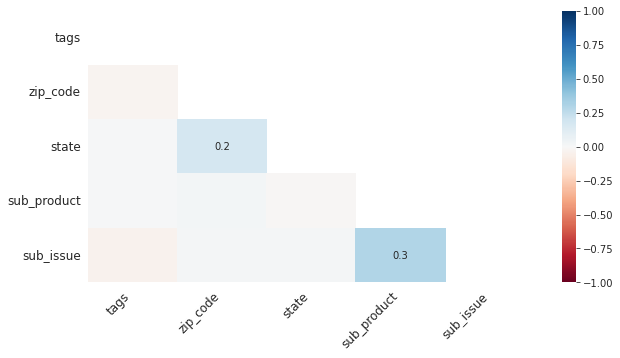

In [179]:
msno.heatmap(df, figsize=(10,5), fontsize=12);

In [31]:
# Replace complaint_what_happened columns blank values by NAN value
df[df.loc[:, 'complaint_what_happened'] == ''] = np.nan

In [171]:
#Remove all rows where complaints column contains nan values
df = df[~df['complaint_what_happened'].isnull()]

# Perform data cleaning 

In [37]:
# Convert complaint_what_happened attribute from object type to string (Required for text processing)
df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)

In [38]:
# function to clean the text and remove all the unnecessary information.
def Text_pre_processing(sentence):
    sentence = sentence.lower() # Text to lowercase
    
    pattern = '\w*\d\w*' # Removing words with numbers in between 
    sentence = re.sub(pattern, '', sentence) 
    pattern = '[^\w\s]' # Removing punctuation
    sentence = re.sub(pattern, '', sentence) 
    
    return sentence

In [39]:
df_pre_processed = pd.DataFrame(df['complaint_what_happened'].apply(Text_pre_processing))

In [ ]:
df_pre_processed

,complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in xxxx and was t...
10,chase card was reported on xxxx however fraudu...
11,on xxxx while trying to book a xxxx xxxx tic...
14,my grand son give me check for i deposit it i...
...,...
19893,i am a victim of identity theft due to the cor...
19895,i opened a checking account with chase as they...
19896,i received two credit card inquiries from ban...
19897,i used my credit card to make a purchase on xx...


In [44]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('averaged_perceptron_tagger')

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [45]:
# Function to Lemmatize the texts
def text_lemmmatize(text):
    sentence = []
    text = nlp(text)
    for token in text:
        sentence.append(token.lemma_)
    return " ".join(sentence)

In [47]:
#Create a dataframe which consits of only the complaints and the lemmatized complaints 
df_pre_processed['complaints_lemmatized'] = df_pre_processed['complaint_what_happened'].apply(text_lemmmatize)

In [46]:
#Extract the Parts of Speech from the pre-processed data
def get_POS(data):
  sentence=[]
  blob = TextBlob(data)
  sentence = [word for (word,tag) in blob.tags if tag=='NN']
  return " ".join(sentence)

In [48]:
# Extract Complaints after removing Parts of Speech tags
df_pre_processed['complaints_removed_POS'] = df_pre_processed['complaints_lemmatized'].apply(get_POS)

<Figure size 2160x2160 with 0 Axes>

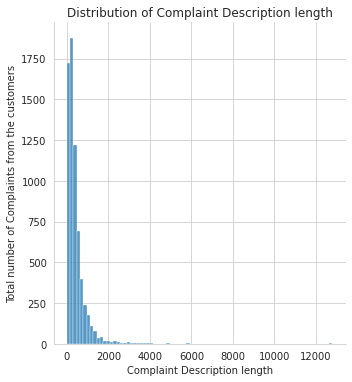

In [166]:
# Data visualization based on complement description length
char_len = [len(each_sent) for each_sent in df_pre_processed['complaints_removed_POS']]

plt.figure(figsize=[30,30])
sns.displot(char_len, kind='hist', bins=80)

plt.xlabel("Complaint Description length")
plt.ylabel("Total number of Complaints from the customers")
plt.title("Distribution of Complaint Description length")
plt.show()

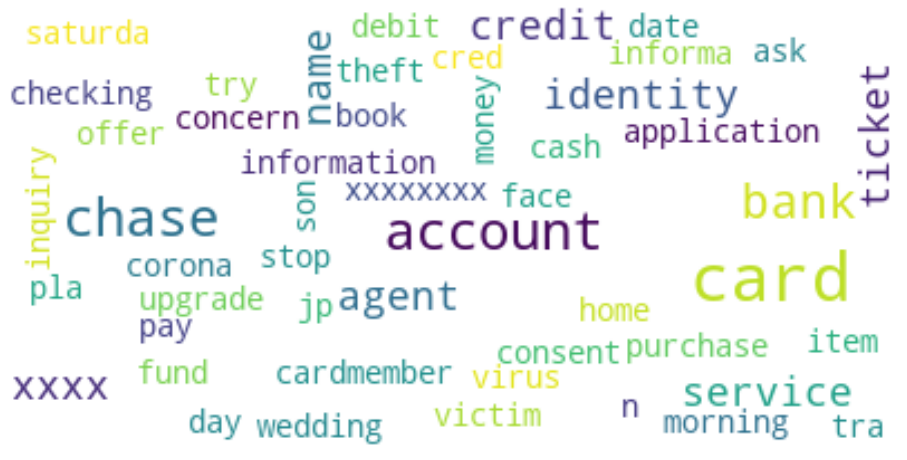

In [55]:
# Display top 50 words used in the complement description 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=30, max_words=50, 
                      background_color="white", random_state=80, 
                      stopwords=stopwords).generate(str(df_pre_processed['complaints_removed_POS']))
plt.figure(figsize=[16,16])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
#Handling -PRON- from the text corpus
df_pre_processed['Complaints'] = df_pre_processed['complaints_removed_POS'].str.replace('-PRON-', '')

In [62]:
# Function to extract top ngrams(unigram/bigram/trigram) based
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

In [71]:
# Display top 50 Unigrams frequency
top50_words = get_top_ngrams(df_pre_processed['Complaints'].values.astype('U'), n=50, ngram=(1,1))
df_unigram = pd.DataFrame(top50_words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,account,16483
1,chase,14751
2,xxxx,13628
3,credit,11091
4,card,9872
5,bank,9054
6,payment,6200
7,charge,5218
8,time,5153
9,xxxxxxxx,4372


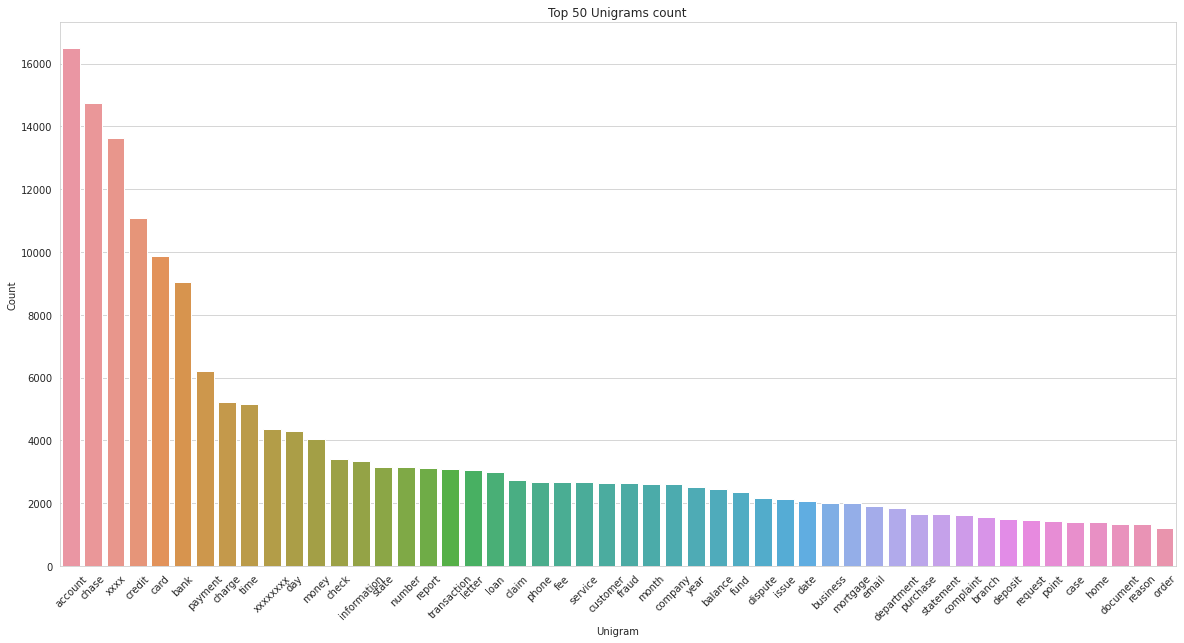

In [72]:
# Display top 50 Unigrams frequency
plt.figure(figsize=[20,10])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Top 50 Unigrams count")
plt.show()

In [73]:
# Display top 50 Bigrams frequency
top50_words = get_top_ngrams(df_pre_processed['Complaints'].values.astype('U'), n=50, ngram=(1,1))
df_bigram = pd.DataFrame(top50_words, columns=['bigram', 'count'])
df_bigram

,bigram,count
0,account,16483
1,chase,14751
2,xxxx,13628
3,credit,11091
4,card,9872
5,bank,9054
6,payment,6200
7,charge,5218
8,time,5153
9,xxxxxxxx,4372


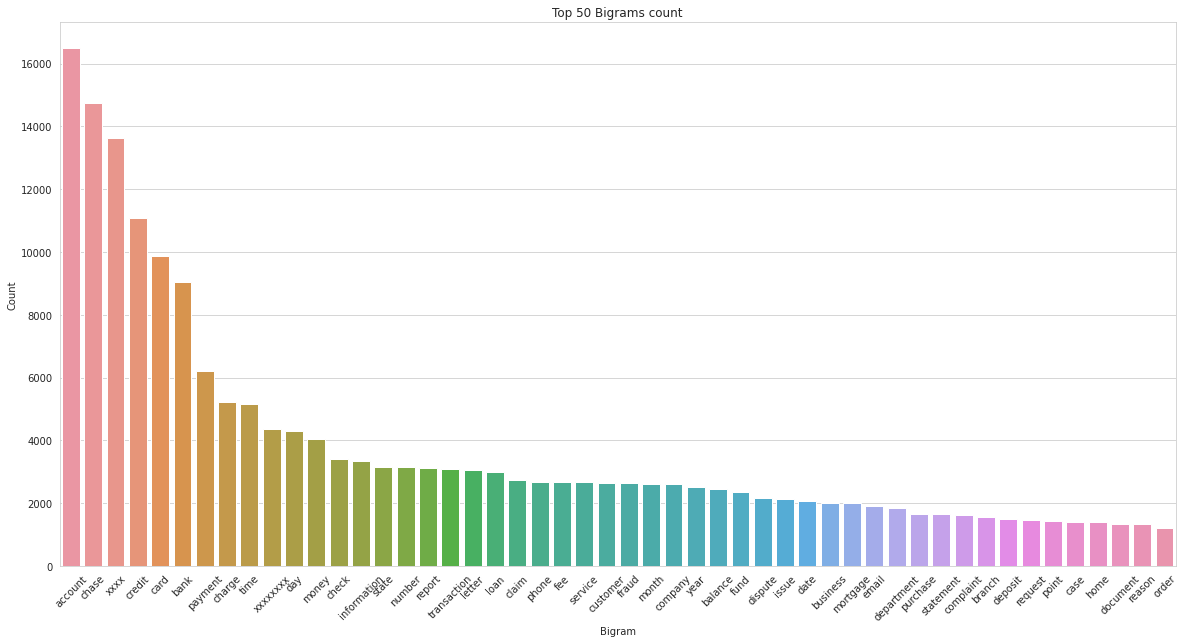

In [74]:
# Display top 50 Bigrams frequency
plt.figure(figsize=[20,10])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Top 50 Bigrams count")
plt.show()

In [75]:
# Display top 50 trigram frequency
top50_words = get_top_ngrams(df_pre_processed['Complaints'].values.astype('U'), n=50, ngram=(1,1))
df_trigram = pd.DataFrame(top50_words, columns=['trigram', 'count'])
df_trigram

,trigram,count
0,account,16483
1,chase,14751
2,xxxx,13628
3,credit,11091
4,card,9872
5,bank,9054
6,payment,6200
7,charge,5218
8,time,5153
9,xxxxxxxx,4372


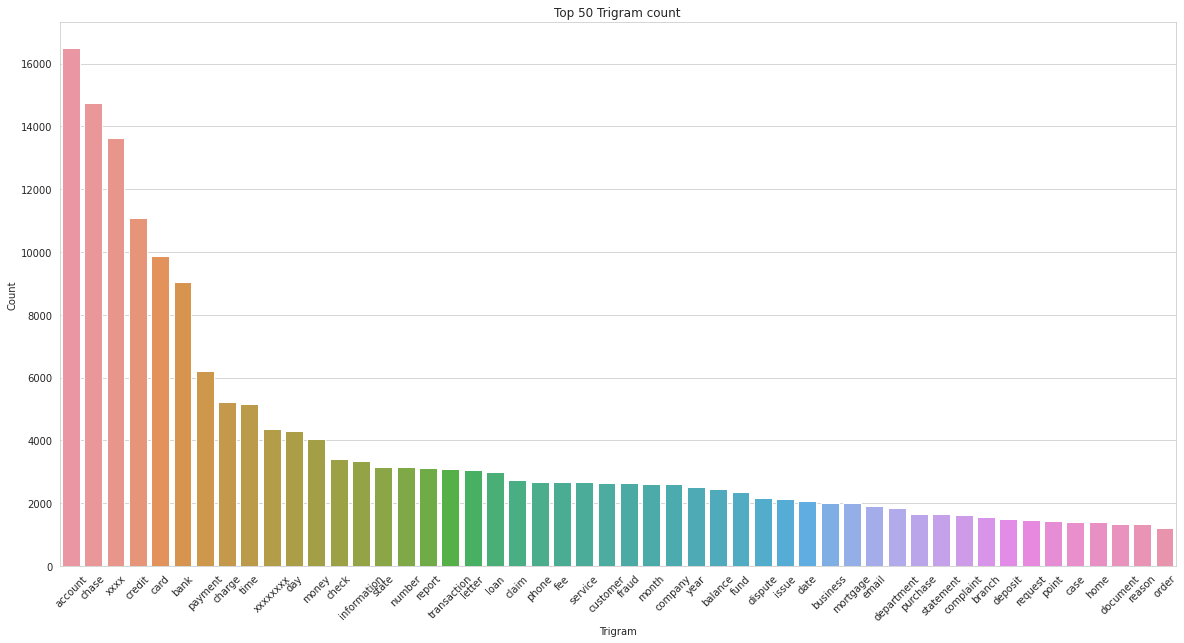

In [76]:
# Display top 50 trigram frequency
plt.figure(figsize=[20,10])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Top 50 Trigram count")
plt.show()

**Clear the 'xxxx' information from the complaint description (It may represent missing value or confidentioal data**

In [77]:
df_pre_processed['Complaints'] = df_pre_processed['Complaints'].str.replace('xxxx','')

In [ ]:
df_pre_processed.to_csv('preprocessed_data.csv')

In [78]:
#Convert the raw textual data into numerical format required for model building.
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')


In [84]:
doctermmatrix = tfidf.fit_transform(df_pre_processed['Complaints'])

In [85]:
# Apply Topic Modelling
from sklearn.decomposition import NMF

In [89]:
#Load nmf_model with the n_components= 5
num_topics = 5

# set the random_state as 50
nmf_model = NMF(n_components=num_topics, random_state=50)

In [90]:
nmf_model.fit(doctermmatrix)
len(tfidf.get_feature_names())

4264

In [91]:
# Display Topic-term matrix
H = nmf_model.components_       

In [94]:
# Display the Top 10 words for each of the topic
words = np.array(tfidf.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 10)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,account,bank,check,money,chase,fund,deposit,branch,day,number
Topic 2,card,credit,chase,account,balance,limit,score,point,year,purchase
Topic 3,payment,loan,mortgage,month,chase,time,year,home,balance,fee
Topic 4,inquiry,report,credit,company,jpmcb,identity,information,reporting,theft,creditor
Topic 5,charge,transaction,dispute,chase,fraud,claim,merchant,fee,purchase,refund


In [97]:
# Build the best topic for each complaint 
topic_results = nmf_model.transform(doctermmatrix)

In [99]:
# The best topic to each of the Complaint in Topic Column
df_pre_processed['Topic'] = topic_results.argmax(axis=1)

In [101]:
# Display the first 10 complaints for each of the Topic
df_clean_5=df_pre_processed.groupby('Topic').head()
df_clean_5.sort_values('Topic')

,complaint_what_happened,complaints_lemmatized,complaints_removed_POS,Complaints,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account auto xxxx,mishandle account auto,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday xxxx branc...,jp chase account debit card tuesday branch cu...,0
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
32,my chase amazon card was declined for a cateri...,my chase amazon card be decline for a catering...,chase card decline catering order place brothe...,chase card decline catering order place brothe...,1
10,chase card was reported on xxxx however fraudu...,chase card be report on xxxx however fraudulen...,card application identity consent service cred...,card application identity consent service cred...,1
23,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,1
2,i upgraded my xxxx xxxx card in xxxx and was t...,I upgrade my xxxx xxxx card in xxxx and be tel...,card xxxx agent upgrade date agent information...,card agent upgrade date agent information ord...,1
50,i am a senior citizen that has been scammed by...,I be a senior citizen that have be scamme by s...,citizen company xxxx time share company nothin...,citizen company time share company nothing re...,1


In [102]:
# Build a mapping of topics to topic names
Topic_names = { 0:"Banking Services", 1:"Loans", 2:"Fraudalent Reporting",
               3:"Card", 4:"Others" }

#Replace Topic with Topic Name
df_pre_processed['Topic'] =df_pre_processed['Topic'].map(Topic_names)

In [103]:
#Create the dictionary  consists of Topic and Topic Name
#"Banking Services":0, "Loans":1, "Fraudalent Reporting":2,"Card":3, "Others":4


Topic_names = { "Banking Services":0, "Loans":1, "Fraudalent Reporting":2,
               "Card":3, "Others":4 }
#Replace Topics with Topic Names
df_pre_processed['Topic'] = df_pre_processed['Topic'].map(Topic_names)

In [104]:
# Drope others columns except Topic and Complaint description (Required for training and testing)
dataset_useful = df_pre_processed[['complaint_what_happened','Topic']]
dataset_useful.head(15)

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in xxxx and was t...,1
10,chase card was reported on xxxx however fraudu...,1
11,on xxxx while trying to book a xxxx xxxx tic...,3
14,my grand son give me check for i deposit it i...,0
15,can you please remove inquiry,3
17,with out notice jp morgan chase restricted my ...,0
20,during the summer months i experience a declin...,2
21,on xxxx xxxx i made a payment to an online re...,4
23,i have a chase credit card which is incorrectl...,1


In [105]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

vect = CountVectorizer()
X_train_cnt = vect.fit_transform(dataset_useful['complaint_what_happened'])

# Save word vector
pickle.dump(vect.vocabulary_, open("count_vector.pk1", "wb"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [106]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pk1', "wb"))

# Building a Logistic Regression model

In [119]:
#Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [120]:
#Split the dataset into training (80) an testing  (20) sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,
                                                    dataset_useful['Topic'],
                                                    test_size=0.20, 
                                                    random_state=30)

In [121]:
reg_models = LogisticRegression(random_state=30).fit(X_train,y_train)

In [122]:
reg_models.score(X_test,y_test)

0.9057164068299925

In [123]:
pickle.dump(reg_models,open("logreg_model.pk1", "wb"))

In [124]:
# Load pickled model
logreg_model = pickle.load(open("logreg_model.pk1", "rb"))

In [125]:
# test the model on test set
y_pred = logreg_model.predict(X_test)

In [126]:
#Display confusion matrix
print(confusion_matrix(y_test,y_pred))

[[328   2   5   3  13]
 [ 10 236   0   2  10]
 [  7   7 269   4   9]
 [  4   9   6 110   4]
 [ 20   7   5   0 277]]


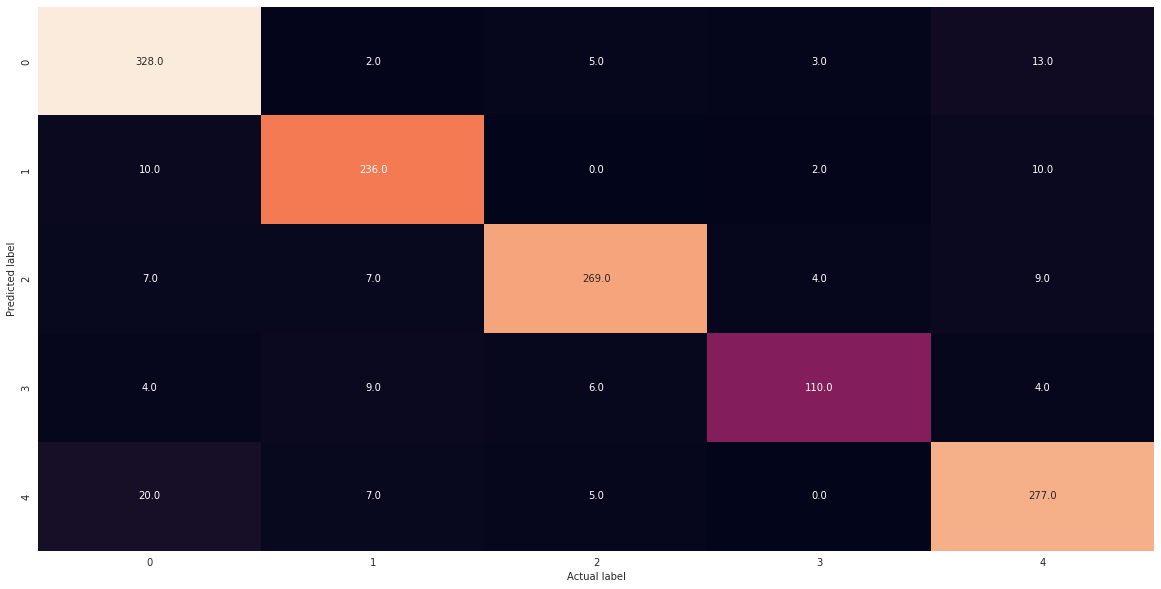

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [129]:
#"Banking Services":0, "Loans":1, "Fraudalent Reporting":2,"Card":3, "Others":4

Topicnames_target = ["Banking Services", "Loans", "Fraudalent Reporting", "Card", "Others"]

# **Evaluation**
We can check precision,recall,f1-score using classification report!

In [130]:
# Display Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                      precision    recall  f1-score   support

    Banking Services       0.89      0.93      0.91       351
               Loans       0.90      0.91      0.91       258
Fraudalent Reporting       0.94      0.91      0.93       296
                Card       0.92      0.83      0.87       133
              Others       0.88      0.90      0.89       309

            accuracy                           0.91      1347
           macro avg       0.91      0.90      0.90      1347
        weighted avg       0.91      0.91      0.91      1347



In [131]:
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# **Building a Decision Tree Classifier**

In [132]:
#Split the dataset into training (80) an testing  (20) sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,
                                                    dataset_useful['Topic'], 
                                                    test_size=0.20, 
                                                    random_state=30)

In [133]:
decision_tree_classifier =  DecisionTreeClassifier(random_state=30).fit(X_train, y_train)

In [134]:
decision_tree_classifier.score(X_test,y_test)

0.7386785449146251

In [135]:
params = {"max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [136]:
# Setup grid hyperparameter search for Decision Tree
from sklearn.model_selection import GridSearchCV
hpdt = GridSearchCV(DecisionTreeClassifier(random_state=50),
                                param_grid=params,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)
# Fit search model
hpdt.fit(X_train, y_train);

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [137]:
#Compute Score
hpdt.score(X_test,y_test)

0.7371937639198218

In [138]:
pickle.dump(hpdt, open("dt_model.pk1", "wb"))

In [139]:
# Load pickled model
dt_model = pickle.load(open("dt_model.pk1", "rb"))

In [155]:
# test on test data
predictions= dt_model.predict(X_test)

In [156]:
# Display Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[273   9  18   7  44]
 [ 11 198   3   9  37]
 [ 19   8 235   3  31]
 [ 15   8   8  91  11]
 [ 56  35  11  11 196]]


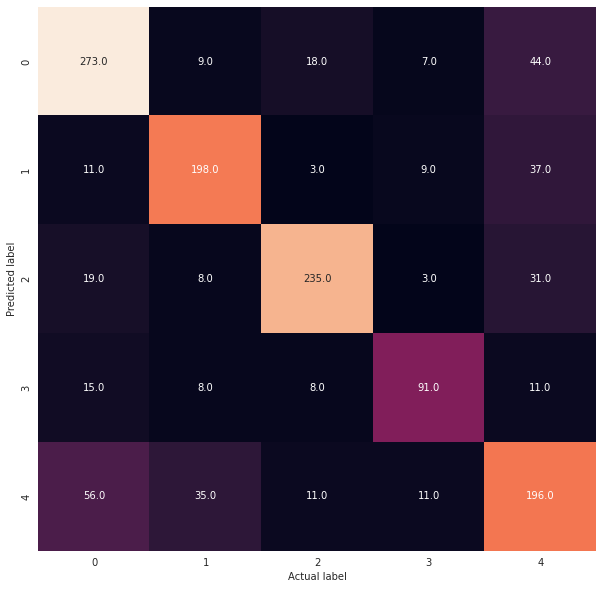

In [157]:
#  Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(y_test, predictions),
                 annot=True,
                 cbar=False, fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [143]:
Topicnames_target = ["Banking Services", "Loans", "Fraudalent Reporting", "Card", "Others"]

# **Evaluation**
We can check precision,recall,f1-score using classification report!

In [144]:
# Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                      precision    recall  f1-score   support

    Banking Services       0.73      0.78      0.75       351
               Loans       0.77      0.77      0.77       258
Fraudalent Reporting       0.85      0.79      0.82       296
                Card       0.75      0.68      0.72       133
              Others       0.61      0.63      0.62       309

            accuracy                           0.74      1347
           macro avg       0.74      0.73      0.74      1347
        weighted avg       0.74      0.74      0.74      1347



# **Building a Random Forest model**

In [150]:

rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [151]:
rf.fit(X_train,y_train)

predictions = rf.predict(X_test)

In [152]:
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)

[[335   3   4   3   6]
 [ 33 184   6   5  30]
 [ 32  19 235   1   9]
 [ 10  10  15  94   4]
 [ 56  14  12   2 225]]


In [153]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7965850037119525

# **Evaluation**
We can check precision,recall,f1-score using classification report!

In [160]:
# Classification Report
print(classification_report(y_test, predictions, target_names = Topicnames_target))

                      precision    recall  f1-score   support

    Banking Services       0.73      0.78      0.75       351
               Loans       0.77      0.77      0.77       258
Fraudalent Reporting       0.85      0.79      0.82       296
                Card       0.75      0.68      0.72       133
              Others       0.61      0.63      0.62       309

            accuracy                           0.74      1347
           macro avg       0.74      0.73      0.74      1347
        weighted avg       0.74      0.74      0.74      1347



# *Experimentation Analysis based on different Ensemble Techniques*


1. Max Voting
2. Averaging
3. Weighted Averaging **bold text**

# **1. Max Voting**

In [145]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8166295471417966

# **2. Averaging**

In [ ]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1+pred2+pred3)/3
print(finalpred)

[[6.51604258e-03 6.82958674e-02 8.55036518e-01 1.03806438e-03
  6.91135080e-02]
 [1.69252648e-03 1.34543880e-01 8.61067351e-01 1.82573562e-03
  8.70506912e-04]
 [9.99439489e-02 5.87346585e-01 1.09392200e-02 1.11597260e-02
  2.90610520e-01]
 ...
 [5.44491408e-03 6.90497547e-02 1.39007070e-03 4.79422362e-04
  9.23635838e-01]
 [3.81656895e-01 3.11421807e-02 4.17493248e-01 2.31221114e-02
  1.46585565e-01]
 [1.27706740e-01 6.74532700e-02 4.43245796e-02 1.52805044e-02
  7.45234906e-01]]


# **3.Weighted Average**

In [ ]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
